In [ ]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


DB_PATH = "../../datasets/CCSMLDatabase.db"
TABLE = "master_clean"

conn = sqlite3.connect(DB_PATH)
df = pd.read_sql_query(
    f"SELECT * FROM master_clean",
    conn,
)
conn.close()

# Global style settings
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"], # Standard crisp fonts
    "axes.linewidth": 1.5,               # Thicker axis lines
    "axes.spines.top": False,            # Remove top spine
    "axes.spines.right": False,          # Remove right spine
    "xtick.major.width": 1.5,            # Match tick thickness to axis
    "ytick.major.width": 1.5,
    "xtick.direction": "out",            # Ticks point outside
    "ytick.direction": "out",
    "font.size": 10,
    "axes.labelsize": 11,
    "axes.labelweight": "normal",
})

n = df.shape[0] 
df.columns

Index(['id', 'tag', 'name', 'pubchemId', 'adduct', 'mass', 'z', 'ccs', 'smi',
       'inchikey', 'superclass', 'class', 'subclass'],
      dtype='object')

# Bar chart of charge state counts

Text(0.5, 0, 'Charge State')

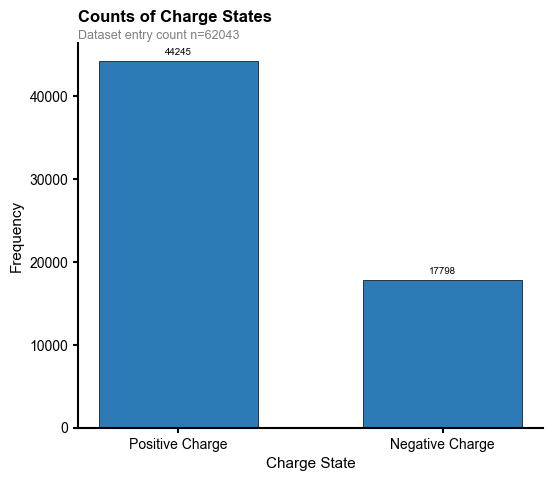

In [6]:
positive_count = len(df[df["z"] > 0])  # or df[df["z"] > 0].shape[0]                                                                    
negative_count = len(df[df["z"] < 0])                                                                                                   
                                                                                                                                        
labels = ["Positive Charge", "Negative Charge"]                                                                                         
values = [positive_count, negative_count]                                                                                               
                                                                                                                                        
fig, ax = plt.subplots(figsize=(6, 5)) 
                                                                                                                                        
bars = ax.bar(labels, values, color='#2c7bb6', width=0.6, edgecolor='black', linewidth=0.5)                                             
ax.bar_label(bars, fmt='%d', padding=3, fontsize=7)  # use %d for integer counts                                                        
                                                                                                                                        
ax.set_title('Counts of Charge States', fontweight='bold', loc='left', pad=15)                                                          
                                                                                                                                        
ax.text(0, 1.01, f'Dataset entry count n={n}',                                                                             
        transform=ax.transAxes, fontsize=9, color='gray')                                                                               
                                                                                                                                        
ax.set_ylabel("Frequency")                                                                                                              
ax.set_xlabel("Charge State")

# CCS distribution overlay by polarity

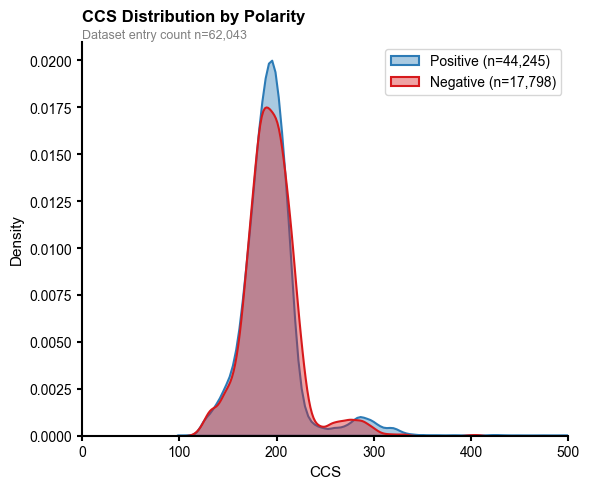

In [7]:
# Split data by polarity
df_positive = df[df["z"] > 0]
df_negative = df[df["z"] < 0]

fig, ax = plt.subplots(figsize=(6, 5)) 

# Plot overlapping histograms with KDE
sns.kdeplot(data=df_positive, x="ccs", ax=ax, color='#2c7bb6', fill=True, alpha=0.4, 
            label=f'Positive (n={len(df_positive):,})', linewidth=1.5)
sns.kdeplot(data=df_negative, x="ccs", ax=ax, color='#d7191c', fill=True, alpha=0.4, 
            label=f'Negative (n={len(df_negative):,})', linewidth=1.5)

ax.set_title('CCS Distribution by Polarity', fontweight='bold', loc='left', pad=15)
ax.text(0, 1.01, f'Dataset entry count n={n:,}',
        transform=ax.transAxes, fontsize=9, color='gray')

ax.set_xlabel("CCS")
ax.set_xlim(0, 500)  # limit x-axis from 0 to 1500                                                                                     
ax.set_ylabel("Density")
ax.legend()

plt.tight_layout()
plt.show()

# m/z vs CCS scatter colored by polarity

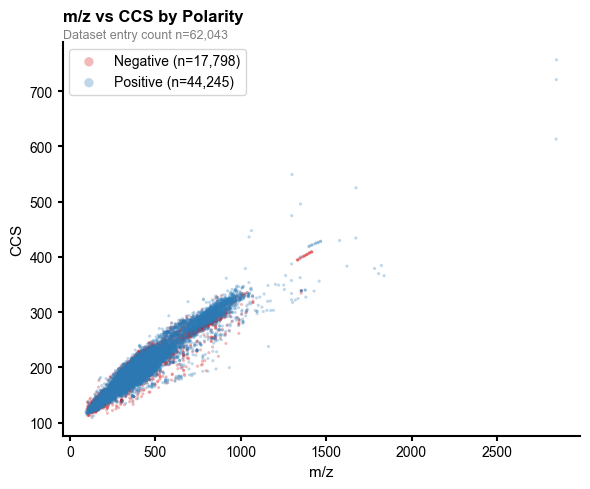

In [8]:
# Create polarity column for coloring
df['polarity'] = df['z'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

fig, ax = plt.subplots(figsize=(6, 5)) 

# Plot scatter with different colors for each polarity
colors = {'Positive': '#2c7bb6', 'Negative': '#d7191c'}

for polarity, group in df.groupby('polarity'):
    ax.scatter(group['mass'], group['ccs'], c=colors[polarity], 
               label=f'{polarity} (n={len(group):,})', alpha=0.3, s=5, edgecolors='none')

ax.set_title('m/z vs CCS by Polarity', fontweight='bold', loc='left', pad=15)
ax.text(0, 1.01, f'Dataset entry count n={n:,}',
        transform=ax.transAxes, fontsize=9, color='gray')

ax.set_xlabel("m/z")
ax.set_ylabel("CCS")
ax.legend(markerscale=3)

plt.tight_layout()
plt.show()